# MP-1
Implement Decision Tree (DT), Random Forest (RF) and Support Vector Machine (SVM) for the classification
#of heart_dataset.csv (dataset).

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Fill this cell
Read the data and assign it to a variable, variable name should be "df" for simplicity

In [3]:
df = pd.read_csv(r'heart_dataset.csv')

### Fill this cell
Show the dataset in tabular form.

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Fill this cell
In order to know about unknown, missing or unproper data, as well as datatype of the dataset
which funtion() / method() should be used? 

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Fill this cell
Describe the dataset statistically

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Fill this cell
Seaborn countplot gives the number of data in the each class, use countplot for this purpose
* g = sns.boxplot(x=df["age"])
* sns.distplot(df.age, bins=100)

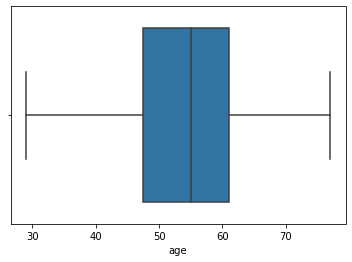

In [8]:
sns.boxplot(x=df["age"])
plt.rcParams["figure.figsize"] = [18,5]
plt.show()

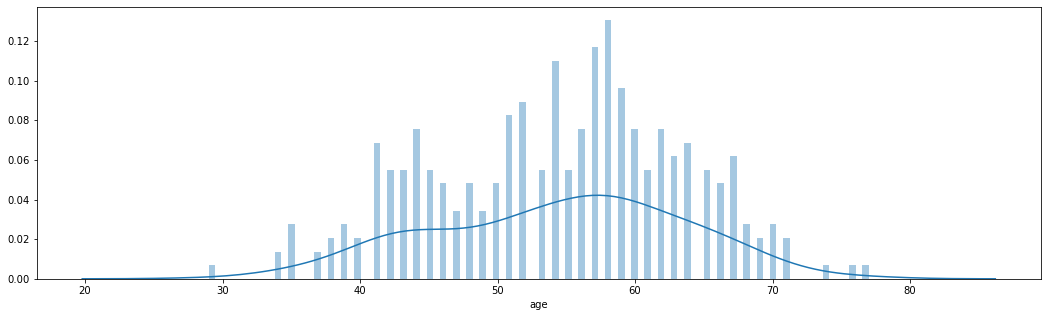

In [9]:
sns.distplot(df.age, bins=100)
plt.rcParams["figure.figsize"] = [18,5]
plt.show()

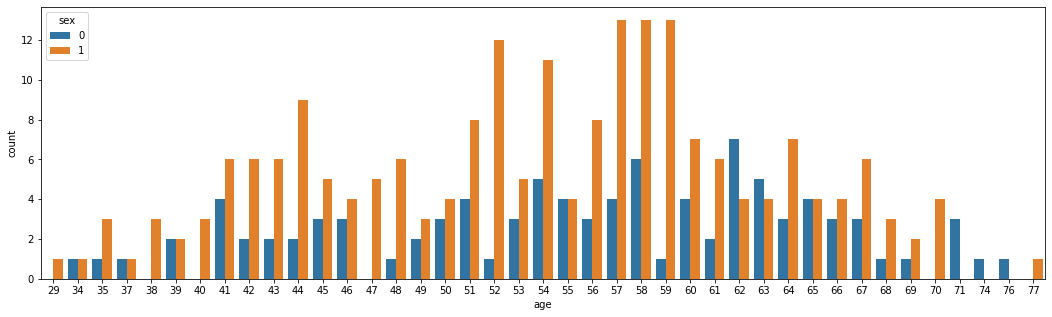

In [10]:
sns.countplot(x="age", hue="sex",data=df)
plt.rcParams["figure.figsize"] = [18,5]
plt.show()

 y has target data (clases) such as 1 and 0. 

In [11]:
# y = df.iloc[:,13:]

In [12]:
# y

In [13]:
# y.groupby('target').size()

In [14]:
y = df.target.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

This means that take target data out from the datasets and assign them to x_data variable

In [15]:
x_data = df.drop(["target"],axis=1)

In [16]:
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


#### Normalization is used to handle with unbalanced features

This gives the values to the features which range from zero to 1.

In [17]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

### Fill this cell
Split the data into two part training (70%) and testing (30%)

HInt test_size=0.3 means 30% is splited as test_data

we need to give any number to random_state in order to split data in the same way when it is reruned

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [22]:
print("X Training set shape =",x_train.shape)
print("X Test set shape =",x_test.shape)

X Training set shape = (212, 13)
X Test set shape = (91, 13)


In [23]:
print("Y Training set shape",y_train.shape)
print("Y Test set shape",y_test.shape)

Y Training set shape (212,)
Y Test set shape (91,)


### Fill this cell
 Build Decision Tree Classification Model

In [24]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)

In [25]:
accuracy_clf1 = round(clf1.score(x_test, y_test)*100,2)
print('accuracy_clf1 =',accuracy_clf1,'%')

accuracy_clf1 = 71.43 %


### Fill this cell
 Use confusion matrix to evaluate the Decision Tree Classification Model

In [26]:
prob_threshold = 0.5

prob_df=pd.DataFrame(clf1.predict_proba(x_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)

prob_df

,Prob of NO,Prob of YES,Decision
0,1.0,0.0,0
1,0.0,1.0,1
2,0.0,1.0,1
3,1.0,0.0,0
4,0.0,1.0,1
5,0.0,1.0,1
6,0.0,1.0,1
7,1.0,0.0,0
8,1.0,0.0,0
9,1.0,0.0,0


In [28]:
y_test[:10]
# y_test.iloc[:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

### Fill this cell
 Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model

In [29]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.svm import SVC

In [30]:
pd.DataFrame(confusion_matrix(y_test, clf1.predict(x_test)),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,33,8
NO,18,32


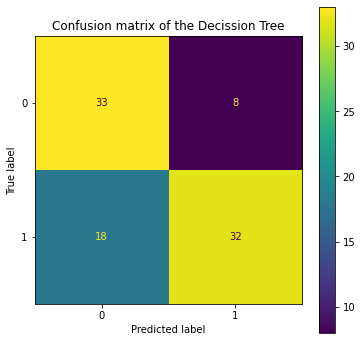

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(clf1, x_test, y_test,ax=ax) 
plt.title('Confusion matrix of the Decission Tree')
plt.show()

### Fill this cell
Build Random Forest Classification Model

In [33]:
from sklearn.ensemble import RandomForestRegressor
clf2 = RandomForestRegressor(n_estimators = 20, random_state = 42)
clf2 = clf2.fit(x_train, y_train)


In [34]:
accuracy_clf2 = round(clf2.score(x_test, y_test)*100,2)
print('accuracy_clf2 =',accuracy_clf2,'%')

accuracy_clf2 = 44.98 %


### Fill this cell
Here we use confusion matrix to evaluate the Random Forest Classification Model

In [36]:
# prob_threshold = 0.5

# prob_df=pd.DataFrame(clf2.predict_proba(x_test[:10]),columns=['Prob of NO','Prob of YES'])
# prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)

# prob_df

# Random Forest Algorithm doesn't contain probablity function that's why confusion matrix can't be plot 

### Fill this cell
Build Support Vector Machine Model

In [37]:
from sklearn import svm
clf3 = svm.SVC()
clf3.fit(x_train, y_train)

SVC()

In [38]:
accuracy_clf3 = round(clf3.score(x_test, y_test),3)*100
print('accuracy_clf3 =',accuracy_clf3,'%')

accuracy_clf3 = 80.2 %


### Fill this cell
Here we use confusion matrix to evaluate the Support Vector Machine Model

In [40]:
# prob_threshold = 0.5

# prob_df=pd.DataFrame(clf3.predict_proba(x_test[:10]),columns=['Prob of NO','Prob of YES'])
# prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)

# prob_df

# SVM Algorithm doesn't contain probablity function that's why confusion matrix can't be plot 